# Laliga Analysis

### Question 1


## Read the dataset using Pandas

Read the dataset with file name 'laliga.csv' into a dataframe with name **laliga**. 

(Take care of Headers, see **skiprows** parameter in **read_csv**)


In [1]:
import numpy as np
import pandas as pd

In [2]:
laliga = pd.read_csv('laliga.csv',skiprows=1)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15


### Question 2

## Take care of Missing values in the dataset

Missing values are given as '-'. Replace all those missing values with 0.

In [3]:
laliga.replace('-',0,inplace=True)

### Question 3

## Exploring the Datset attributes

Find all the attributes(columns) in the dataset.

In [4]:
laliga.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

### Question 4

## Checking the index of the dataframe and change it with desired attribute.

Change the default index of the laliga dataframe with **'Team'** attribute.

In [5]:
ind =laliga.index

In [6]:
ind

RangeIndex(start=0, stop=61, step=1)

In [7]:
laliga.set_index('Team')

,Pos,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,,
Real Madrid,1,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
Barcelona,2,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
Atletico Madrid,3,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
Valencia,4,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
Athletic Bilbao,5,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xerez,57,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
Condal,58,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
Atletico Tetuan,59,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16


In [8]:
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15




## Descriptive Stats

### Question 5

What is the Team that has got maximum championships and whats the maximum count? [consider the **Champions** column]

**Note:** Check the datatype of the column when you are operating on a column, by using **dtype** and change it to required using **astype**

In [9]:
laliga['Champion'].dtype

dtype('O')

In [10]:
laliga.Champion = laliga.Champion.astype('int64')

In [11]:
laliga['Champion'].dtype

dtype('int64')

In [12]:
mx=laliga['Champion'].max()


In [15]:
mx

33

In [13]:
rslt_df = laliga.loc[(laliga['Champion'] == mx)]

In [14]:
rslt_df['Team']

0    Real Madrid
Name: Team, dtype: object

### Question 6

Which Team has come more times under **sixth position** and how many times? (**include** sixth position also)

In [16]:
laliga['T'].dtype

dtype('O')

In [17]:
laliga['T'] = laliga['T'].astype('int64')

In [18]:
laliga['T'].dtype

dtype('int64')

In [19]:
sx=laliga['T'].max()

In [20]:
sx

83

In [21]:
rnk_df = laliga.loc[(laliga['T'] == sx)]

In [22]:
rnk_df['Team']

1    Barcelona
Name: Team, dtype: object

### Question 7

Lets define **Goal difference** as the difference between the **GoalsFor** and **GoalsAgainst**. And it can take negative values also.

Print all the goal differences for all the teams.

Write a function with name **goal_diff_count** which should return all the teams with their Goal Differences.

Write a function with name **max_goal_diff_team** which should return the team with max Goal Difference.

Write a function with name **min_goal_diff_team** which should return the team with min Goal Difference.



In [23]:
def Goal_diff_count():   
     laliga['Goal_diff_count'] = laliga['GoalsFor'].astype(int)-laliga['GoalsAgainst'].astype(int)
     return laliga[['Team','Goal_diff_count']].sort_values(by = 'Goal_diff_count',ascending=False)
    
Goal_diff_count()

,Team,Goal_diff_count
0,Real Madrid,2807
1,Barcelona,2786
2,Atletico Madrid,1225
4,Athletic Bilbao,931
3,Valencia,929
...,...,...
27,Murcia,-385
19,Las Palmas,-399
14,Sporting Gijon,-399
12,Valladolid,-413


In [24]:
def max_goal_diff_team(): 
  return Goal_diff_count().head(1)

In [25]:
def min_goal_diff_team():
  return Goal_diff_count().tail(1)

In [26]:
max_goal_diff_team()

,Team,Goal_diff_count
0,Real Madrid,2807


In [27]:
min_goal_diff_team()

,Team,Goal_diff_count
13,Racing Santander,-525


In [28]:
Goal_diff_count()

,Team,Goal_diff_count
0,Real Madrid,2807
1,Barcelona,2786
2,Atletico Madrid,1225
4,Athletic Bilbao,931
3,Valencia,929
...,...,...
27,Murcia,-385
19,Las Palmas,-399
14,Sporting Gijon,-399
12,Valladolid,-413


### Question 8

## Adding new attribute to the dataframe

Create a new column in the laliga dataframe with name **WinningPercent** which is percentage of winning. And fill all missing values with 0.

**Percentage of Winning = (GamesWon - GamesPlayed)*100 **


In [29]:
laliga['WinningPercent'] = (laliga['GamesWon'].astype(int)/laliga['GamesPlayed'].astype(int)) *100

In [30]:
laliga['WinningPercent'].fillna(0,inplace = True)

In [31]:
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Goal_diff_count,WinningPercent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1,2807,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1,2786,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1,1225,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1,929,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1,931,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20,-28,21.052632
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16,-20,23.333333
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16,-34,23.333333
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15,-31,16.666667


## Slicing a dataframe

### Question 9



Print all the columns from **Seasons** and **GoalsAgainst**.

In [32]:
laliga[['Seasons','GoalsAgainst']]

,Seasons,GoalsAgainst
0,86,3140
1,86,3114
2,80,3309
3,82,3469
4,86,3700
...,...,...
56,1,66
57,1,57
58,1,85
59,1,65


### Question 10

Print all the teams which have started playing between **1930-1980**.

**Steps:**

Split the start year first.

Check the data type and change it to **int** if its not. 

Then do the operation on that.

In [33]:
df_Debut = laliga[laliga['Debut'].astype(str).str[:4].astype(int).between(1930, 1980)]




In [34]:
df_Debut[['Team','Debut']]

,Team,Debut
3,Valencia,1931-32
5,Sevilla,1934-35
8,Zaragoza,1939-40
9,Real Betis,1932-33
10,Deportivo La Coruna,1941-42
11,Celta Vigo,1939-40
12,Valladolid,1948-49
14,Sporting Gijon,1944-45
15,Osasuna,1935-36
16,Malaga,1949-50


### Question 11

Print the rows with Team name **'Real Madrid'**, **Getafe** and **'Valencia'**.

In [35]:
laliga['Team'].dtype

dtype('O')

In [36]:
laliga['Team'] = laliga['Team'].astype(str)

In [37]:
laliga['Team'].dtype

dtype('O')

In [38]:
tms =['Real Madrid','Getafe','Valencia']

In [39]:
tms_df = laliga[laliga['Team'].isin(tms)]

In [40]:
tms_df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Goal_diff_count,WinningPercent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1,2807,59.630702
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1,929,44.557057
24,25,Getafe,12,553,456,147,112,197,520,633,0,0,0,0,0,1,1,2004-05,2015-16,6,-113,32.236842


### Question 12

Print the columns with columns **'Points'**, **'GamesWon'** and **'WinningPercent'**.

In [41]:
laliga[['Points','GamesWon','WinningPercent']]

,Points,GamesWon,WinningPercent
0,4385,1647,59.630702
1,4262,1581,57.241130
2,3442,1241,47.475134
3,3386,1187,44.557057
4,3368,1209,43.772629
...,...,...,...
56,34,8,21.052632
57,22,7,23.333333
58,19,7,23.333333
59,14,5,16.666667


### Question 13

**Double** the **Points** for all the **Teams** and save it in the dataframe as well.

In [42]:
laliga['Points'].dtype

dtype('O')

In [43]:
laliga['Points'] = laliga['Points'].astype('int64')

In [44]:
laliga['Points'].dtype

dtype('int64')

In [45]:
laliga['Double']=laliga['Points']*2

In [46]:
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Goal_diff_count,WinningPercent,Double
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1,2807,59.630702,8770
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1,2786,57.241130,8524
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1,1225,47.475134,6884
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1,929,44.557057,6772
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1,931,43.772629,6736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20,-28,21.052632,68
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16,-20,23.333333,44
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16,-34,23.333333,38
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15,-31,16.666667,28


### Question 14

In [ ]:
Using the concepts of decision tree and KNN algorithm, Find the top 4 teams of Laliga.
Hint : try to classify the complete dataset into top4 and non-top4 teams.

In [47]:
laliga['Pos'].dtype

dtype('int64')

In [48]:
fin =[]
for i in laliga['Pos']:
  if (i<=4):
    fin.append(1)
  else:
    fin.append(0)

In [49]:
laliga['fin']=fin

In [50]:
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Goal_diff_count,WinningPercent,Double,fin
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1,2807,59.630702,8770,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1,2786,57.241130,8524,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1,1225,47.475134,6884,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1,929,44.557057,6772,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1,931,43.772629,6736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20,-28,21.052632,68,0
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16,-20,23.333333,44,0
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16,-34,23.333333,38,0
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15,-31,16.666667,28,0


In [51]:
cols=['Team', 'T', 'Debut','Since/LastApp', 'BestPosition','Double','Goal_diff_count']

In [52]:
laliga.drop(columns=cols,inplace=True)

In [53]:
laliga

,Pos,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,WinningPercent,fin
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,59.630702,1
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,57.241130,1
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,47.475134,1
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,44.557057,1
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,43.772629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,1,34,38,8,10,20,38,66,0,0,0,0,0,0,21.052632,0
57,58,1,22,30,7,8,15,37,57,0,0,0,0,0,0,23.333333,0
58,59,1,19,30,7,5,18,51,85,0,0,0,0,0,0,23.333333,0
59,60,1,14,30,5,4,21,34,65,0,0,0,0,0,0,16.666667,0


In [54]:
X = laliga.iloc[:,:-1].values

In [55]:
X

array([[1, 86, 4385, '2762', '1647', '552', '563', '5947', '3140', 33,
        '23', '8', '8', '3', '4', 59.630702389572775],
       [2, 86, 4262, '2762', '1581', '573', '608', '5900', '3114', 25,
        '25', '12', '12', '4', '6', 57.241129616220135],
       [3, 80, 3442, '2614', '1241', '598', '775', '4534', '3309', 10,
        '8', '16', '9', '7', '6', 47.47513389441469],
       [4, 82, 3386, '2664', '1187', '616', '861', '4398', '3469', 6,
        '6', '10', '11', '10', '7', 44.55705705705706],
       [5, 86, 3368, '2762', '1209', '633', '920', '4631', '3700', 8,
        '7', '10', '5', '8', '10', 43.77262853005069],
       [6, 73, 2819, '2408', '990', '531', '887', '3680', '3373', 1, '4',
        '4', '5', '12', '6', 41.11295681063123],
       [7, 82, 2792, '2626', '948', '608', '1070', '3609', '3889', 0, 0,
        '4', '5', '2', '5', 36.1005331302361],
       [8, 70, 2573, '2302', '864', '577', '861', '3228', '3230', 2, '3',
        '2', '5', '4', '3', 37.532580364900085],
    

In [56]:
y=laliga.iloc[:,-1:].values

In [57]:
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [58]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree=DecisionTreeClassifier()

In [61]:
dtree.fit(X_Train,y_Train)

DecisionTreeClassifier()

In [62]:
y_pred = dtree.predict(X_Test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print("Classification report - \n", classification_report(y_Test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.50      1.00      0.67         1

    accuracy                           0.95        19
   macro avg       0.75      0.97      0.82        19
weighted avg       0.97      0.95      0.96        19



In [65]:
from sklearn.tree import plot_tree

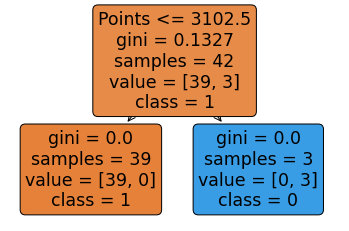

In [66]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = laliga.columns, 
                     class_names =["1", "0"] , filled = True , precision = 4, rounded = True)

In [67]:
X_Train1, X_Test1, y_Train1, y_Test1 = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_Train1, y_Train1)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [69]:
y_pred1 = knn.predict(X_Test1)

In [70]:
print("Classification report - \n", classification_report(y_Test1,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Question 15

In [ ]:
Compare both the models for their Accuracy score, Precision, Recall and F1 score.
Hint : Plot graphs comparing the evaluation metrices.

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
acc1=accuracy_score(y_Test, y_pred)

In [73]:
acc1

0.9473684210526315

In [74]:
acc2=accuracy_score(y_Test1, y_pred1)

In [75]:
acc2

0.875

In [76]:
l1=[acc1,0.97,0.96,0.95]

In [77]:
l2=[acc2,0.77,0.88,0.82]

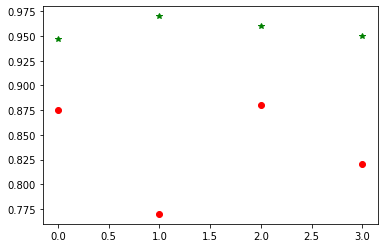

In [79]:
import matplotlib.pyplot as plt
plt.plot(l1,'g*',l2,'ro')
plt.show()

In [82]:
li1=['accuracy1','accuracy2']
li2=[acc1,acc2]

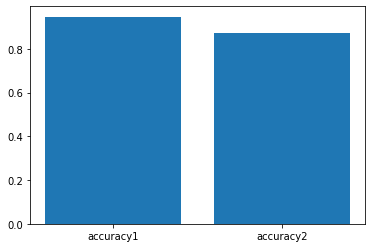

In [83]:
import matplotlib.pyplot as plt
plt.bar(li1,li2)
plt.show()

### Question 16 


In [ ]:
Compare and discuss the confusion matrix of both the models.

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_Test, y_pred)

array([[17,  1],
       [ 0,  1]])

There are no false negatives in first model

In [86]:
confusion_matrix(y_Test1, y_pred1)

array([[14,  0],
       [ 2,  0]])

There are no true positive and false positives in second model